#  Project 2: Topic Classification 
ECE 7995_1801_003: Detection and Estimation 
Submitted By: Prabhjot Kaur


In this project, you will carry out topic classification on a series of text documents. You will do this in a Bayesian fashion, using a Naive Bayes classifier as we will discuss in class. 
This is a simple example of natural language processing.For this project, you will use the twenty newsgroups dataset, which is a standard benchmark dataset in the machine learning and natural language processing literature. 
It contains ~20,000 messages posted to discussion newsgroups evenly over twenty topics.
Its website is here (http://qwone.com/~jason/20Newsgroups/),  and the scikit-learn documentation for this dataset is here (http://scikit-learn.org/stable/datasets/twenty_newsgroups.html),

The goal of topic classification with this dataset is to predict to which newsgroup any given message belongs. 
We will use the bag of words model to design a classifier that works on the words counts of each message.

In [60]:
import numpy as np
from scipy import linalg
from skimage import transform as tf
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import math

Q1. Import the training dataset into Python using the 'fetch_20newsgroups' module. 
The dataset is automatically partitioned into training and test sets, and you can get the training set by using the subset='train' option on the loader.

Q2. Specify the model
The bag-of-words model supposes that each message can be classified by the frequency of words alone.
The likelihood function for each class is therefore given by the multinomial distribution. 
If a document is from class c, and it has word-counts xi for each word i in a dictionary of k words,
then the likelihood function is  p(x | c,p) = C*p1x1*p2x2*...*pkxk, with C just the normalizing constant. 
pi indicates the probability that any word the kth word in the dictionary. We do not know these probabilities, 
but must estimate them from the training set. For naive Bayes estimation, you must specify a prior over the probabilities pi. 
The conjugate prior for the categorical and multinomial distributions is the Dirichlet distribution:
p(p) = 1/B(a) * p11-a1*p21-a2*...*pk1-ak, where the normalizing coefficient is the Beta function.
To specify the model, you must choose a dictionary and choose a prior. 
For the dictionary, choose the 100 words most commonly found in the training set. For the priors, use your own judgement!

Q3. Estimate the probabilities pi. For each class c, compute the counts of the each of the dictionary words. 
Using these counts, find the posterior distribution p(p | x), taking advantage of the fact that the Dirichlet distribution 
is conjugate to the multinomial. Once you have the posterior, choose either the MMSE or MAP estimate of the word probabilities p. Plot the probabilities for each of the twenty classes. What stands out? Which words are most associated with each class?

Q4. Using these probabilities, derive the ML estimator of the classes. (HINT: The classifier should be linear!) 
Use this classifier on the test set. Compute the probability of error and the confusion matrix of the classifier. 

In [73]:
# Q1 
# For Dictionary size = 100
MAX_WORDS = 100  #get the first 100 most used words from the dataset
newsgroups_train_all = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))

#This code extracts the  most commonly used words in the newsgroup
cv = CountVectorizer(max_features=MAX_WORDS) # Convert a collection of text documents to a matrix of token counts
counts = cv.fit_transform(newsgroups_train_all.data) #counts frequencies for each words, # gives tuples. example: (0, 9) 1: meaning in document 0, word 9 occured 1 time.

#Let's print out the words to see what they are
words = cv.get_feature_names()
#print(words)

Most occuring words in class:  ['alt.atheism']
['it', 'new', 'the', 'their', 'two']


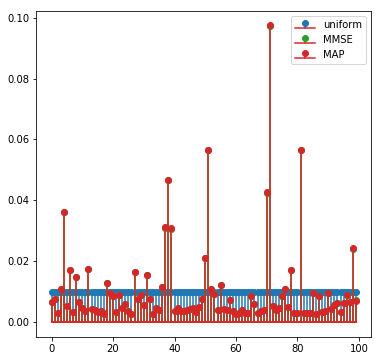

Most occuring words in class:  ['comp.graphics']
['any', 'out', 'time', 'very']


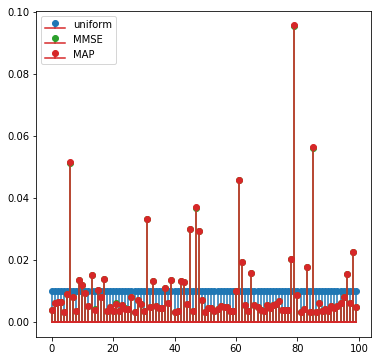

Most occuring words in class:  ['comp.os.ms-windows.misc']
['has', 'people']


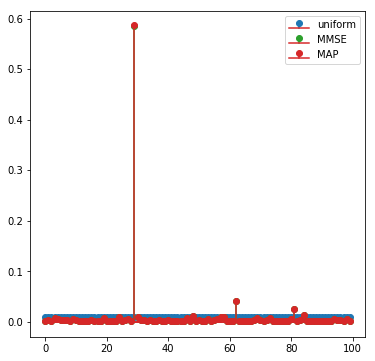

Most occuring words in class:  ['comp.sys.ibm.pc.hardware']
['any', 'this', 'use']


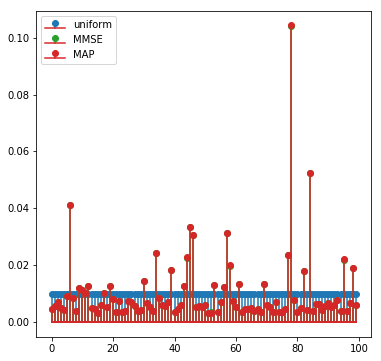

Most occuring words in class:  ['comp.sys.mac.hardware']
['are', 'these', 'up']


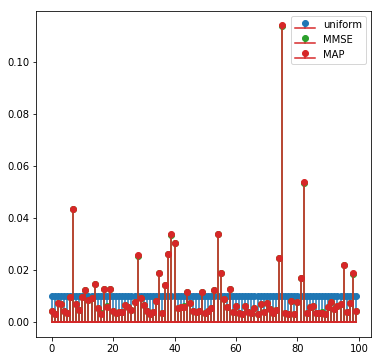

Most occuring words in class:  ['comp.windows.x']
['and', 'my', 'their', 'think']


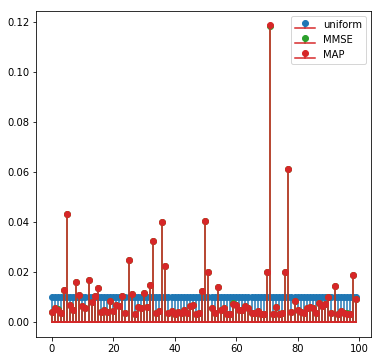

Most occuring words in class:  ['misc.forsale']
['been', 'into', 'use', 'well']


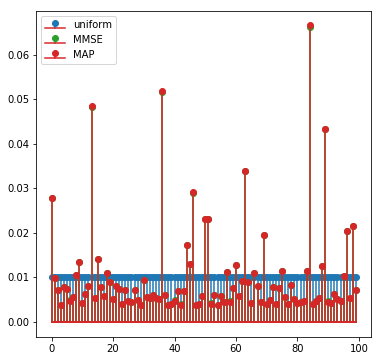

Most occuring words in class:  ['rec.autos']
['any', 'their', 'two']


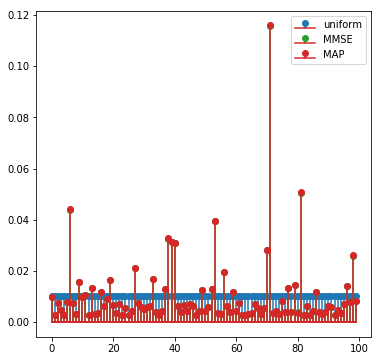

Most occuring words in class:  ['rec.motorcycles']
['and', 'of', 'them', 'to']


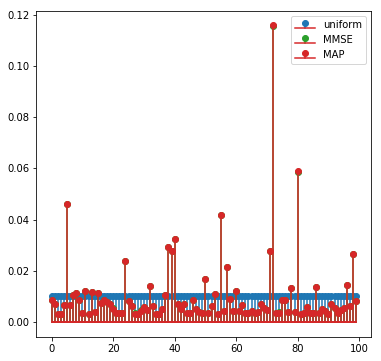

Most occuring words in class:  ['rec.sport.baseball']
['as', 'them', 'two']


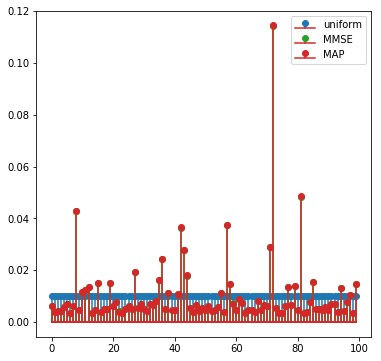

Most occuring words in class:  ['rec.sport.hockey']
['time', 'was']


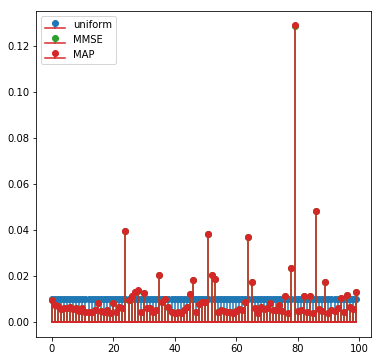

Most occuring words in class:  ['sci.crypt']
['and', 'one', 'they', 'very']


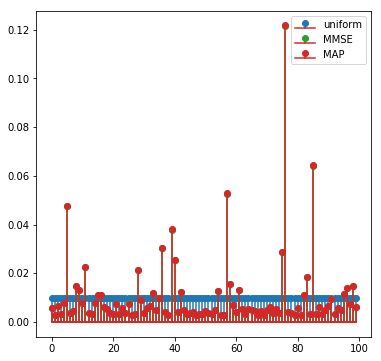

Most occuring words in class:  ['sci.electronics']
['and', 'my', 'such', 'there']


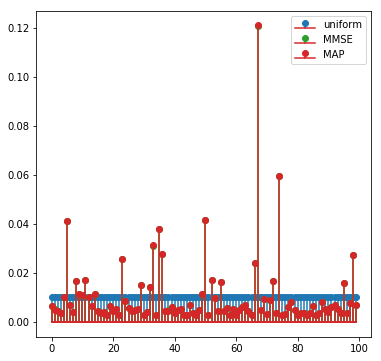

Most occuring words in class:  ['sci.med']
['any', 'of', 'them', 'two']


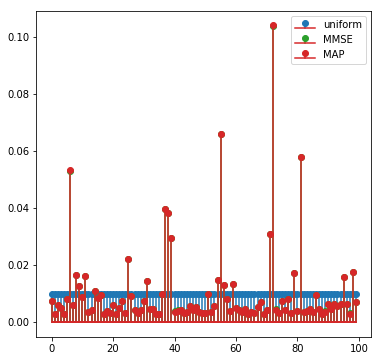

Most occuring words in class:  ['sci.space']
['and', 'not', 'their', 'two']


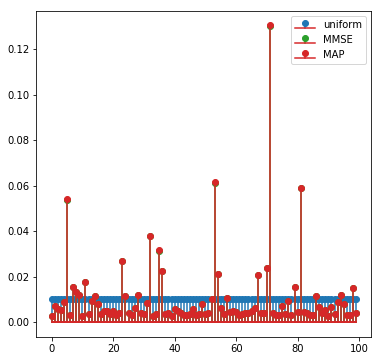

Most occuring words in class:  ['soc.religion.christian']
['and', 'on', 'their', 'them', 'us']


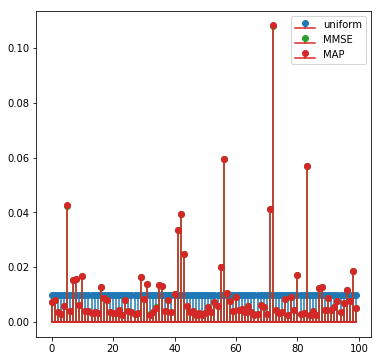

Most occuring words in class:  ['talk.politics.guns']
['an', 'new', 'such', 'this']


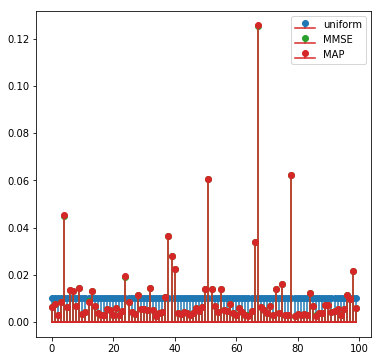

Most occuring words in class:  ['talk.politics.mideast']
['and', 'is', 'of', 'them', 'up']


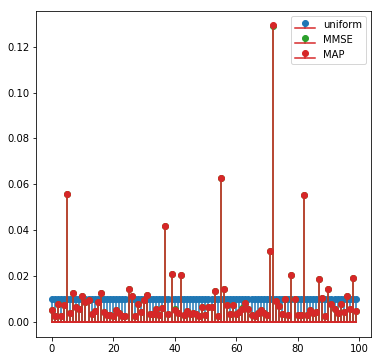

Most occuring words in class:  ['talk.politics.misc']
['an', 'much', 'than', 'that', 'to']


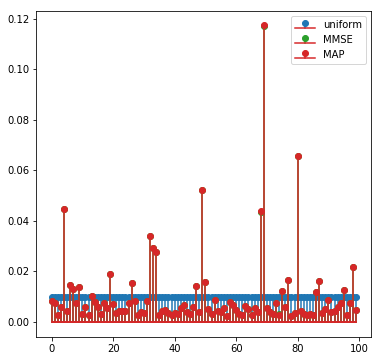

Most occuring words in class:  ['talk.religion.misc']
['and', 'not', 'their', 'them', 'up']


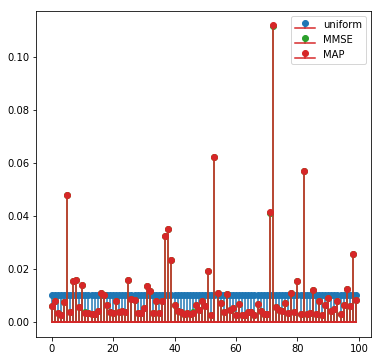

In [74]:
# Q2. Specify the model. 
# Q3. Estimate the probabilities for each class

categories = newsgroups_train_all.target_names
alpha = 10 #1 corresponds to a uniform distribution over the distributions; higher values concentrate the prior around the uniform distribution
theta_MMSE_store = np.zeros((20,MAX_WORDS))

for i, category in enumerate(categories):
    newsgroups_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'),categories=[category])
    counts = cv.fit_transform(newsgroups_train.data) #counts frequencies for each words, # gives tuples
    docs_tot = counts.shape[0] # total number of documents in a particular category
    y = np.array(np.sum(counts[0:docs_tot,:],0))
    y = np.reshape(y,(MAX_WORDS,))
    alpha_new = alpha + y
    
    theta_MMSE = alpha_new/np.sum(alpha_new)
    theta_MAP = (alpha_new-1)/np.sum(alpha_new-1)
    theta_MMSE_store[i,:] = theta_MMSE
    
    indices = theta_MAP>0.04
    idx= np.asarray(np.where(indices))[0,:]
    print('Most occuring words in class: ', [category])
    print([words[i] for i in idx])

    plt.figure(figsize=(6,6))
    plt.stem(1/MAX_WORDS*np.ones(MAX_WORDS),linefmt='C0',markerfmt='C0o')
    plt.stem(theta_MMSE,linefmt='C2',markerfmt='C2o')
    plt.stem(theta_MAP,linefmt='C3',markerfmt='C3o')
    plt.legend(['uniform','MMSE','MAP'])
    plt.show()


The probablity of error of the classifer is:  0.8763940520446096


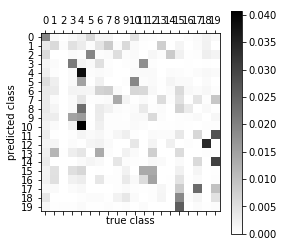

In [82]:
# Q4. ML estimator 

newsgroups_test_all = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'))

categories = newsgroups_test_all.target_names
conf_matrix = np.zeros((20,20))
P_err = 0
for i, category in enumerate(categories):
    newsgroups_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'),categories=[category])
    counts = cv.fit_transform(newsgroups_test.data) 
    counts_dense = counts.todense()
    true_target = i
    docs_tot = counts.shape[0] # total number of documents in a particular category
    
    for docs in range(0,docs_tot):
        doc = counts_dense[docs,:]
        total_words = np.sum(doc)
        likelihoods = np.zeros(20)
        for j in range(0,20):
            cls_prb_est = theta_MMSE_store[j,:]
            num = 0
            den = 1
            for k in range(0,100):
                num = num + doc[0,k]*np.log(cls_prb_est[k])
                den = den*math.factorial(doc[0,k])
            #likelihood_cls = (num/den)*total_words
            likelihoods_cls = num
            likelihoods[j] = likelihoods_cls
        ML_est = np.argmax(likelihoods)
        conf_matrix[true_target,ML_est] = conf_matrix[true_target,ML_est] +1
        if true_target != ML_est:
            P_err = P_err+1

normalized_confmtrx = conf_matrix/np.sum(conf_matrix)
plt.matshow(normalized_confmtrx, cmap=plt.cm.gray_r)
plt.colorbar()
tick_marks = np.arange(0,20)
plt.xticks(tick_marks)
plt.yticks(tick_marks)
plt.ylabel('predicted class')
plt.xlabel('true class')

print('The probablity of error of the classifer is: ', P_err/np.sum(conf_matrix))
            
        


Q5. Repeat (2)-(4) using a dictionary size of 500, 1000, and 5000. How does performance change? Can you see why?

In [66]:
# For dictionary size of 500
MAX_WORDS = 500 

Most occuring words in class:  ['alt.atheism']
['34', 'her', 'history', 'idea', 'non', 'team', 'technology', 'told']


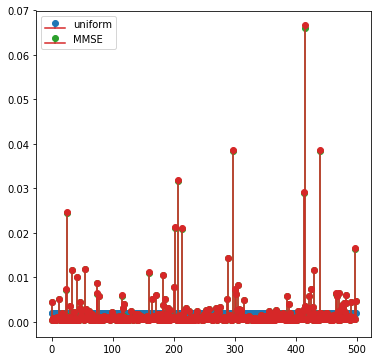

Most occuring words in class:  ['comp.graphics']
['above', 'ever', 'hope', 'memory', 'take', 'this']


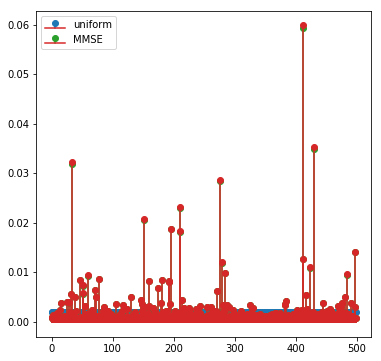

Most occuring words in class:  ['comp.os.ms-windows.misc']
['days', 'money']


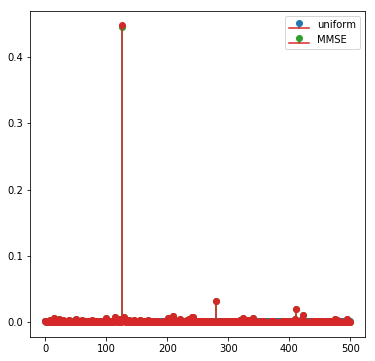

Most occuring words in class:  ['comp.sys.ibm.pc.hardware']
['ago', 'just', 'these', 'too']


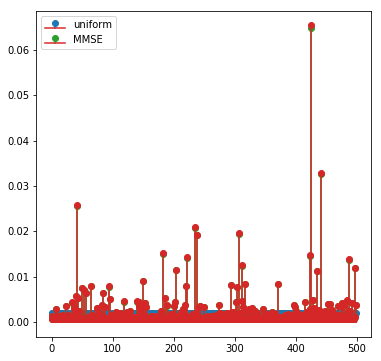

Most occuring words in class:  ['comp.sys.mac.hardware']
['although', 'info', 'number', 'think', 'type']


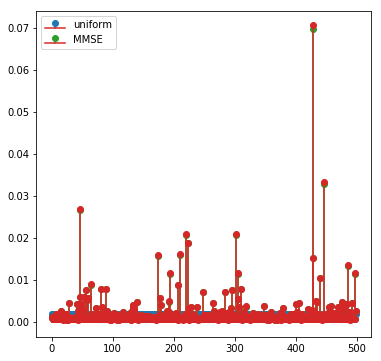

Most occuring words in class:  ['comp.windows.x']
['80', 'heard', 'idea', 'message', 'stuff', 'that']


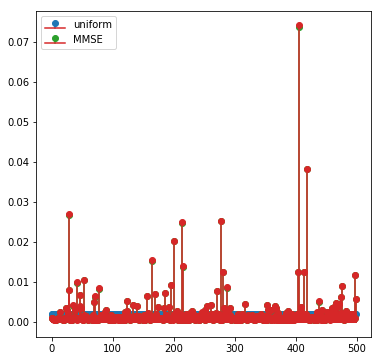

Most occuring words in class:  ['misc.forsale']
['anything', 'go', 'think', 'two']


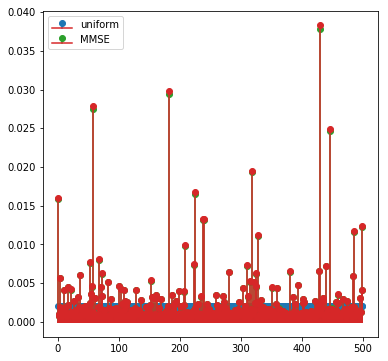

Most occuring words in class:  ['rec.autos']
['93', 'her', 'how', 'human', 'nasa', 'sun', 'think']


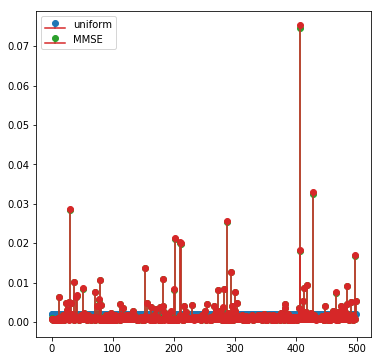

Most occuring words in class:  ['rec.motorcycles']
['50', 'if', 'new', 'than', 'today']


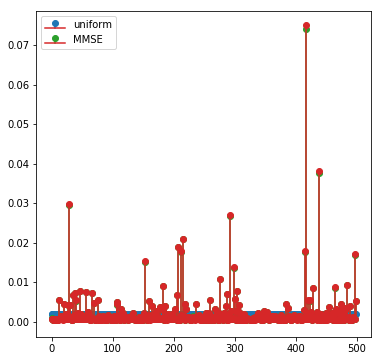

Most occuring words in class:  ['rec.sport.baseball']
['armenian', 'instead', 'now', 'their', 'too']


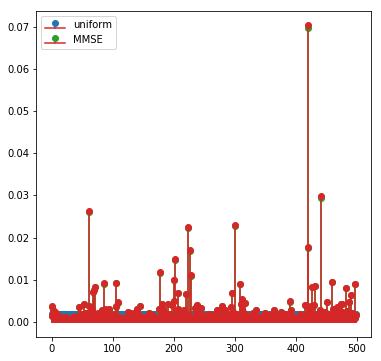

Most occuring words in class:  ['rec.sport.hockey']
['christian', 'let', 'phone', 'thought', 'up']


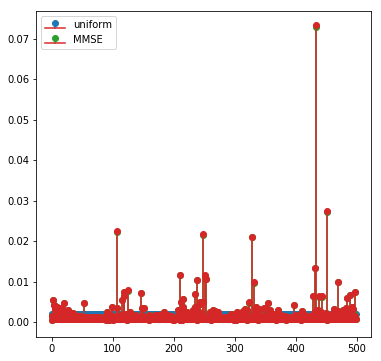

Most occuring words in class:  ['sci.crypt']
['a86', 'how', 'include', 'next', 'these', 'true']


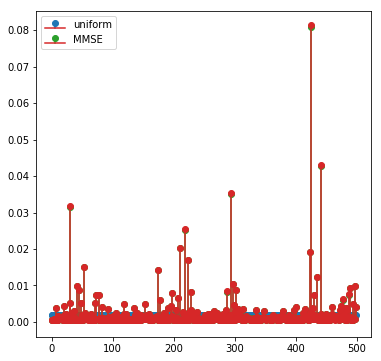

Most occuring words in class:  ['sci.electronics']
['80', 'here', 'image', 'my', 'technology', 'three']


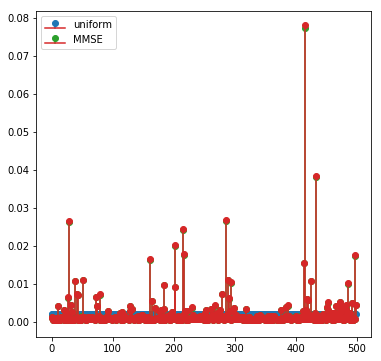

Most occuring words in class:  ['sci.med']
['93', 'him', 'image', 'national', 'than', 'thanks', 'times']


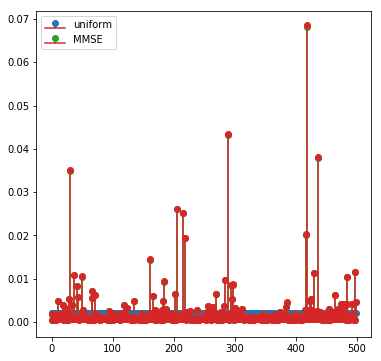

Most occuring words in class:  ['sci.space']
['against', 'has', 'him', 'nasa', 'this', 'understand']


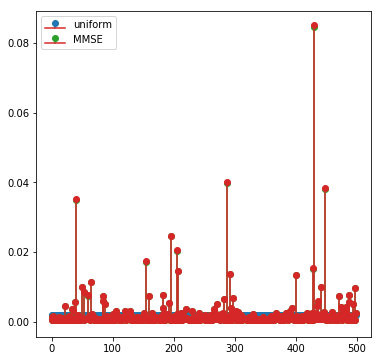

Most occuring words in class:  ['soc.religion.christian']
['93', 'her', 'history', 'nasa', 'tell', 'than', 'today']


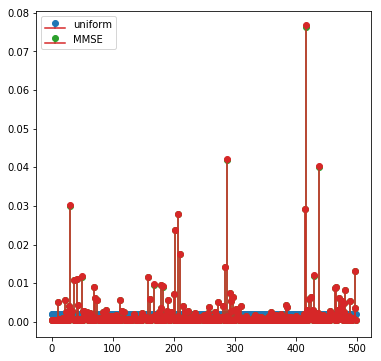

Most occuring words in class:  ['talk.politics.guns']
['about', 'however', 'non', 'than', 'thanks', 'times']


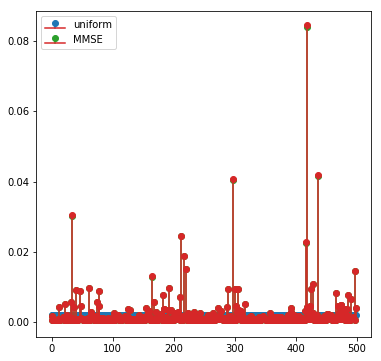

Most occuring words in class:  ['talk.politics.mideast']
['40', 'history', 'often', 'team', 'technology', 'through']


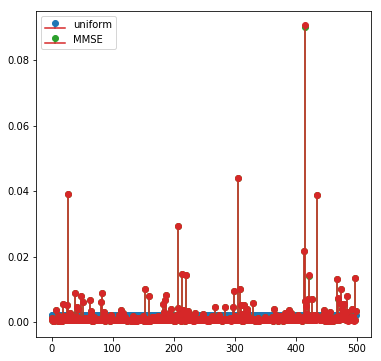

Most occuring words in class:  ['talk.politics.misc']
['40', 'heard', 'history', 'national', 'that', 'the', 'today']


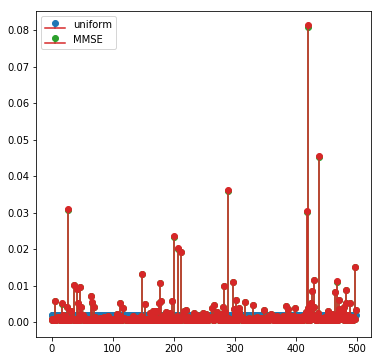

Most occuring words in class:  ['talk.religion.misc']
['27', 'help', 'his', 'number', 'tell', 'than', 'times']


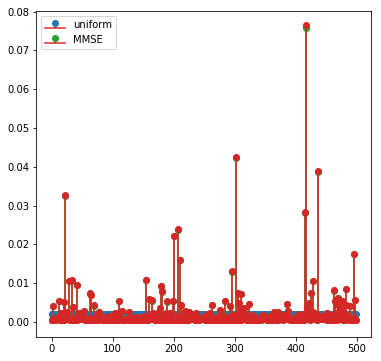

The probablity of error of the classifer is:  0.9192777482740307


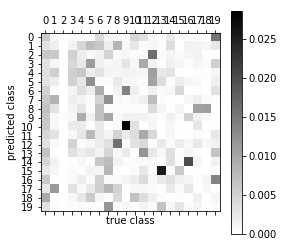

In [67]:
# (2) - (4)
newsgroups_train_all = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))

cv = CountVectorizer(max_features=MAX_WORDS) 
counts = cv.fit_transform(newsgroups_train_all.data) 

#Let's print out the words to see what they are
words = cv.get_feature_names()
#print(words)

categories = newsgroups_train_all.target_names
alpha = 10 #1 corresponds to a uniform distribution over the distributions; higher values concentrate the prior around the uniform distribution
theta_MMSE_store = np.zeros((20,MAX_WORDS))

for i, category in enumerate(categories):
    newsgroups_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'),categories=[category])
    counts = cv.fit_transform(newsgroups_train.data) #counts frequencies for each words, # gives tuples
    docs_tot = counts.shape[0] # total number of documents in a particular category
    y = np.array(np.sum(counts[0:docs_tot,:],0))
    y = np.reshape(y,(MAX_WORDS,))
    alpha_new = alpha + y
    
    theta_MMSE = alpha_new/np.sum(alpha_new)
    theta_MAP = (alpha_new-1)/np.sum(alpha_new-1)
    theta_MMSE_store[i,:] = theta_MMSE
    
    indices = theta_MAP>0.02
    idx= np.asarray(np.where(indices))[0,:]
    print('Most occuring words in class: ', [category])
    print([words[i] for i in idx])

    plt.figure(figsize=(6,6))
    plt.stem(1/MAX_WORDS*np.ones(MAX_WORDS),linefmt='C0',markerfmt='C0o')
    plt.stem(theta_MMSE,linefmt='C2',markerfmt='C2o')
    plt.stem(theta_MAP,linefmt='C3',markerfmt='C3o')
    plt.legend(['uniform','MMSE','MAP'])
    plt.show()
    

# ML Estimator
newsgroups_test_all = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'))

categories = newsgroups_test_all.target_names
conf_matrix = np.zeros((20,20))
P_err = 0
for i, category in enumerate(categories):
    newsgroups_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'),categories=[category])
    counts = cv.fit_transform(newsgroups_test.data) 
    counts_dense = counts.todense()
    true_target = i
    docs_tot = counts.shape[0] # total number of documents in a particular category
    
    for docs in range(0,docs_tot):
        doc = counts_dense[docs,:]
        total_words = np.sum(doc)
        likelihoods = np.zeros(20)
        for j in range(0,20):
            cls_prb_est = theta_MMSE_store[j,:]
            num = 0
            den = 1
            for k in range(0,100):
                #num = num*(cls_prb_est[k]**doc[0,k])
                num = num + doc[0,k]*np.log(cls_prb_est[k])
                den = den*math.factorial(doc[0,k])
            #likelihood_cls = (num/den)*total_words
            likelihoods_cls = num
            likelihoods[j] = likelihoods_cls
        ML_est = np.argmax(likelihoods)
        conf_matrix[true_target,ML_est] = conf_matrix[true_target,ML_est] +1
        if true_target != ML_est:
            P_err = P_err+1

normalized_confmtrx = conf_matrix/np.sum(conf_matrix)
plt.matshow(normalized_confmtrx, cmap=plt.cm.gray_r)
plt.colorbar()
tick_marks = np.arange(0,20)
plt.xticks(tick_marks)
plt.yticks(tick_marks)
plt.ylabel('predicted class')
plt.xlabel('true class')

print('The probablity of error of the classifer is: ', P_err/np.sum(conf_matrix))
            

In [68]:
# For dictionary size of 1000
MAX_WORDS = 1000

Most occuring words in class:  ['alt.atheism']
['44', 'human', 'nice', 'test', 'text', 'today']


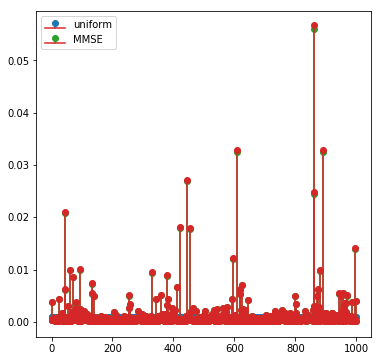

Most occuring words in class:  ['comp.graphics']
['after', 'mind', 'than', 'thought']


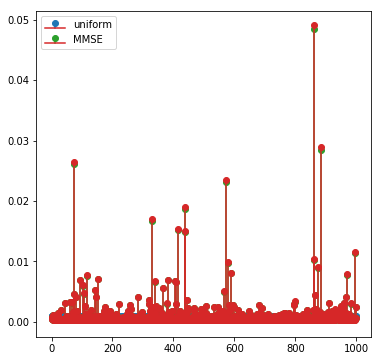

Most occuring words in class:  ['comp.os.ms-windows.misc']
['crime', 'military']


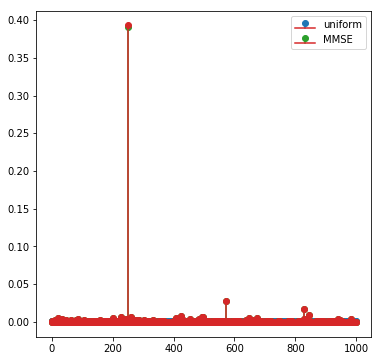

Most occuring words in class:  ['comp.sys.ibm.pc.hardware']
['and', 'them', 'times']


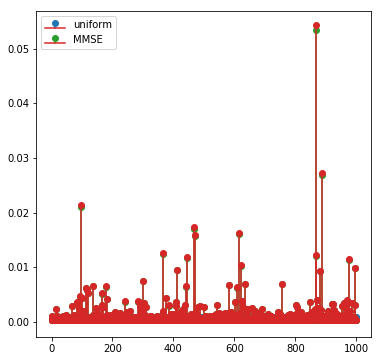

Most occuring words in class:  ['comp.sys.mac.hardware']
['an', 'three', 'turkish']


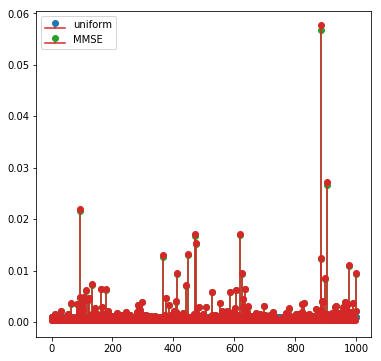

Most occuring words in class:  ['comp.windows.x']
['about', 'history', 'more', 'sure', 'than']


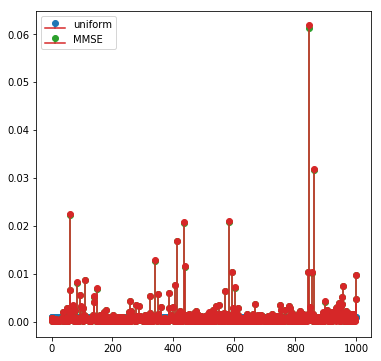

Most occuring words in class:  ['misc.forsale']
['away', 'general', 'thanks']


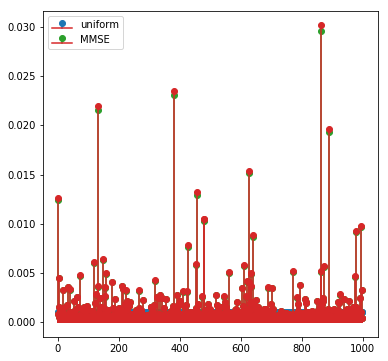

Most occuring words in class:  ['rec.autos']
['again', 'needs', 'thanks', 'time']


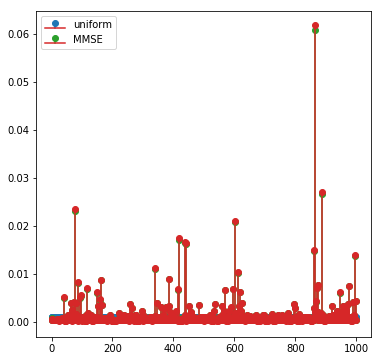

Most occuring words in class:  ['rec.motorcycles']
['75', 'my', 'test', 'thus']


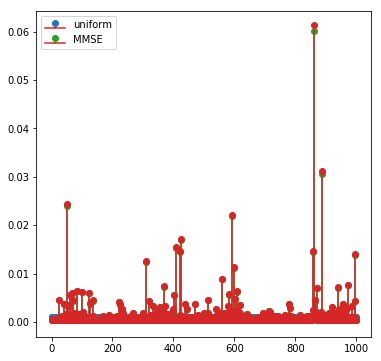

Most occuring words in class:  ['rec.sport.baseball']
['belief', 'think', 'turkey']


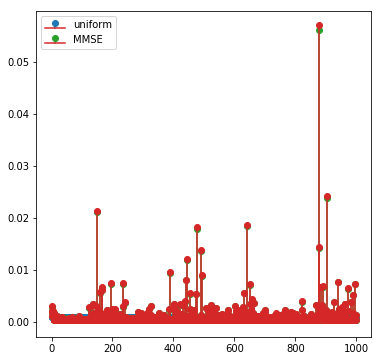

Most occuring words in class:  ['rec.sport.hockey']
['therefore', 'too']


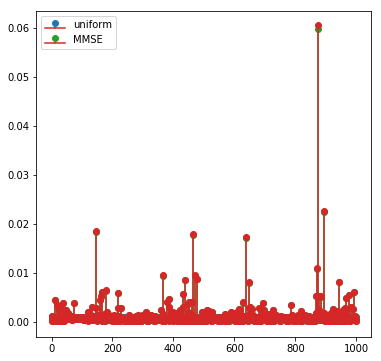

Most occuring words in class:  ['sci.crypt']
['act', 'includes', 'net', 'therefore', 'too']


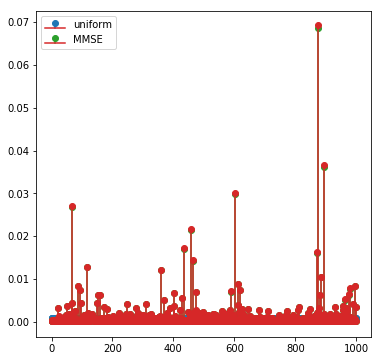

Most occuring words in class:  ['sci.electronics']
['again', 'nor', 'them', 'title']


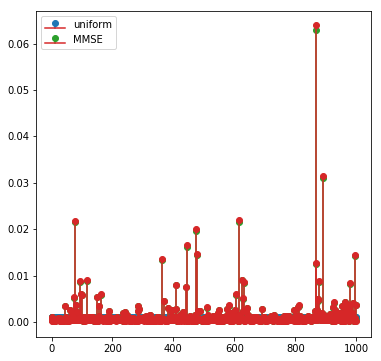

Most occuring words in class:  ['sci.med']
['access', 'here', 'included', 'new', 'them', 'today']


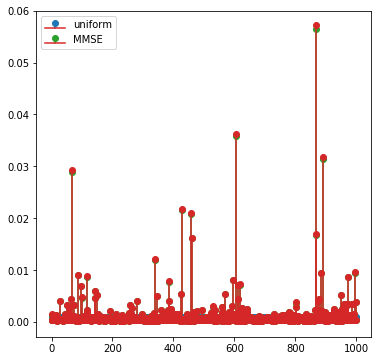

Most occuring words in class:  ['sci.space']
['along', 'happened', 'network', 'thing', 'total']


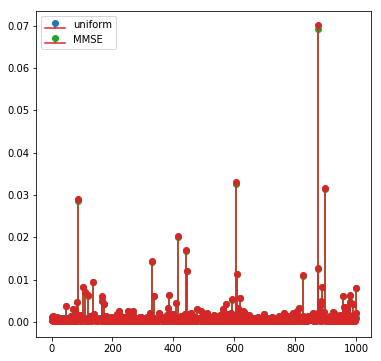

Most occuring words in class:  ['soc.religion.christian']
['a86', 'have', 'him', 'mouse', 'text', 'than', 'times']


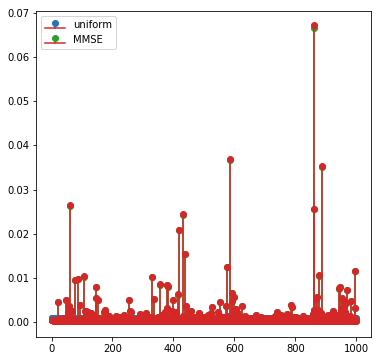

Most occuring words in class:  ['talk.politics.guns']
['again', 'ideas', 'normal', 'theory', 'too']


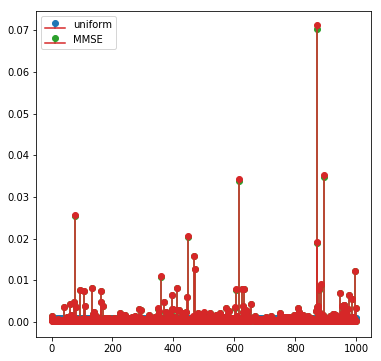

Most occuring words in class:  ['talk.politics.mideast']
['act', 'hit', 'number', 'test', 'through']


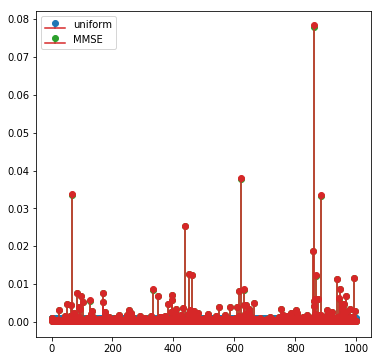

Most occuring words in class:  ['talk.politics.misc']
['93', 'he', 'myself', 'them', 'themselves', 'to']


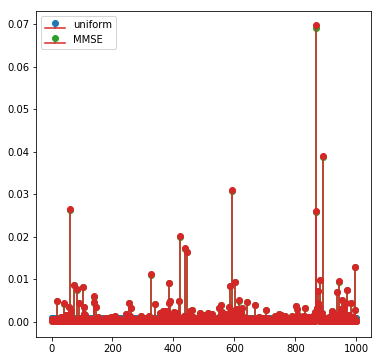

Most occuring words in class:  ['talk.religion.misc']
['80', 'his', 'needed', 'that', 'the', 'too']


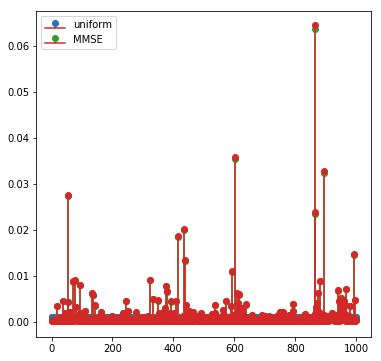

The probablity of error of the classifer is:  0.9379978757302178


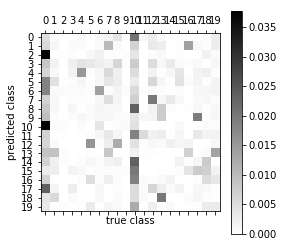

In [69]:
# (2) - (4)
newsgroups_train_all = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))

cv = CountVectorizer(max_features=MAX_WORDS) 
counts = cv.fit_transform(newsgroups_train_all.data) 

#Let's print out the words to see what they are
words = cv.get_feature_names()
#print(words)

categories = newsgroups_train_all.target_names
alpha = 10 #1 corresponds to a uniform distribution over the distributions; higher values concentrate the prior around the uniform distribution
theta_MMSE_store = np.zeros((20,MAX_WORDS))

for i, category in enumerate(categories):
    newsgroups_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'),categories=[category])
    counts = cv.fit_transform(newsgroups_train.data) #counts frequencies for each words, # gives tuples
    docs_tot = counts.shape[0] # total number of documents in a particular category
    y = np.array(np.sum(counts[0:docs_tot,:],0))
    y = np.reshape(y,(MAX_WORDS,))
    alpha_new = alpha + y
    
    theta_MMSE = alpha_new/np.sum(alpha_new)
    theta_MAP = (alpha_new-1)/np.sum(alpha_new-1)
    theta_MMSE_store[i,:] = theta_MMSE
    
    indices = theta_MAP>0.02
    idx= np.asarray(np.where(indices))[0,:]
    print('Most occuring words in class: ', [category])
    print([words[i] for i in idx])

    plt.figure(figsize=(6,6))
    plt.stem(1/MAX_WORDS*np.ones(MAX_WORDS),linefmt='C0',markerfmt='C0o')
    plt.stem(theta_MMSE,linefmt='C2',markerfmt='C2o')
    plt.stem(theta_MAP,linefmt='C3',markerfmt='C3o')
    plt.legend(['uniform','MMSE','MAP'])
    plt.show()
    

# ML Estimator
newsgroups_test_all = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'))

categories = newsgroups_test_all.target_names
conf_matrix = np.zeros((20,20))
P_err = 0
for i, category in enumerate(categories):
    newsgroups_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'),categories=[category])
    counts = cv.fit_transform(newsgroups_test.data) 
    counts_dense = counts.todense()
    true_target = i
    docs_tot = counts.shape[0] # total number of documents in a particular category
    
    for docs in range(0,docs_tot):
        doc = counts_dense[docs,:]
        total_words = np.sum(doc)
        likelihoods = np.zeros(20)
        for j in range(0,20):
            cls_prb_est = theta_MMSE_store[j,:]
            num = 0
            den = 1
            for k in range(0,100):
                #num = num*(cls_prb_est[k]**doc[0,k])
                num = num + doc[0,k]*np.log(cls_prb_est[k])
                den = den*math.factorial(doc[0,k])
            #likelihood_cls = (num/den)*total_words
            likelihoods_cls = num
            likelihoods[j] = likelihoods_cls
        ML_est = np.argmax(likelihoods)
        conf_matrix[true_target,ML_est] = conf_matrix[true_target,ML_est] +1
        if true_target != ML_est:
            P_err = P_err+1

normalized_confmtrx = conf_matrix/np.sum(conf_matrix)
plt.matshow(normalized_confmtrx, cmap=plt.cm.gray_r)
plt.colorbar()
tick_marks = np.arange(0,20)
plt.xticks(tick_marks)
plt.yticks(tick_marks)
plt.ylabel('predicted class')
plt.xlabel('true class')

print('The probablity of error of the classifer is: ', P_err/np.sum(conf_matrix))
            

In [71]:
# For dictionary size of 5000
MAX_WORDS = 5000

Most occuring words in class:  ['alt.atheism']
['93', 'his', 'indicates', 'injured', 'mr', 'tickets', 'tie', 'trials']


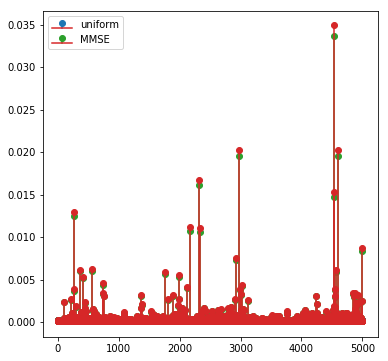

Most occuring words in class:  ['comp.graphics']
['annual', 'hits', 'mostly', 'taken', 'tend']


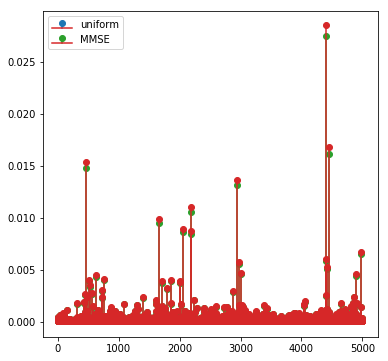

Most occuring words in class:  ['comp.os.ms-windows.misc']
['corporation', 'mitchell', 'stadium']


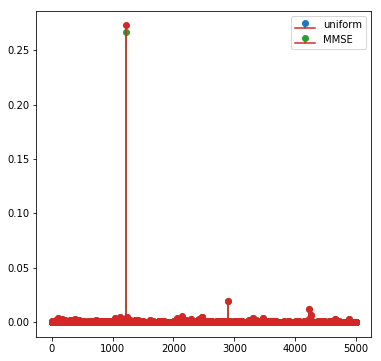

Most occuring words in class:  ['comp.sys.ibm.pc.hardware']
['brown', 'jb', 'threatened', 'tools']


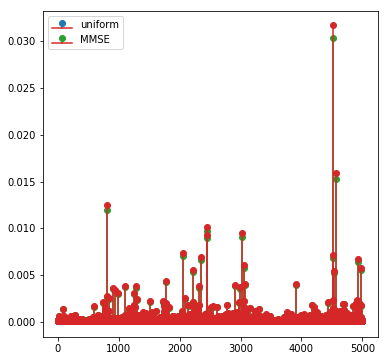

Most occuring words in class:  ['comp.sys.mac.hardware']
['cal', 'structures', 'switzerland']


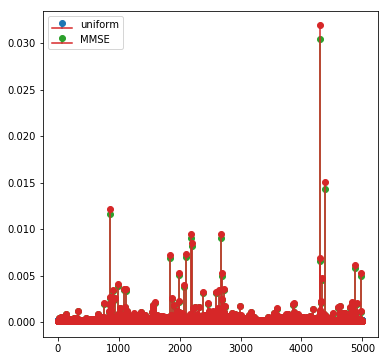

Most occuring words in class:  ['comp.windows.x']
['and', 'get', 'happened', 'materials', 'sick', 'something']


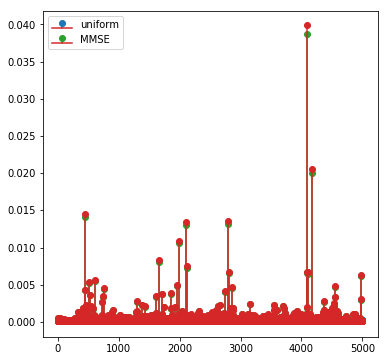

Most occuring words in class:  ['misc.forsale']
['based', 'follow', 'stone']


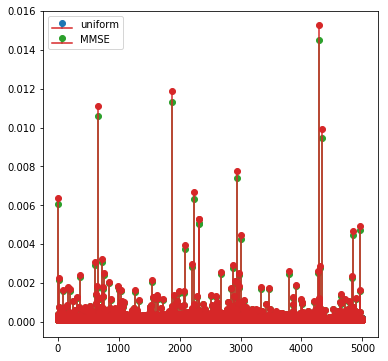

Most occuring words in class:  ['rec.autos']
['agencies', 'least', 'speeds', 'submit']


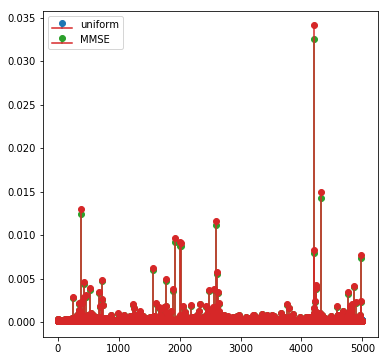

Most occuring words in class:  ['rec.motorcycles']
['alcohol', 'move', 'ti', 'transmission']


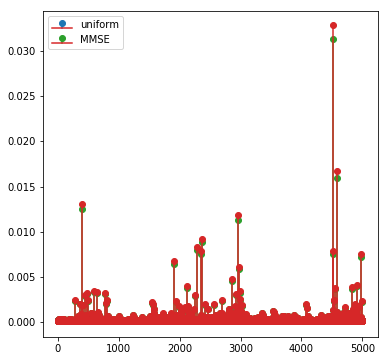

Most occuring words in class:  ['rec.sport.baseball']
['because', 'guidelines', 'manuals', 'stuff', 'sy']


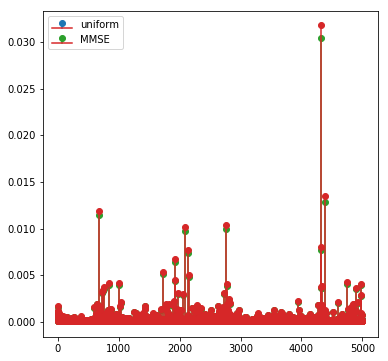

Most occuring words in class:  ['rec.sport.hockey']
['b8', 'going', 'necessarily', 'telecommunications', 'thinking']


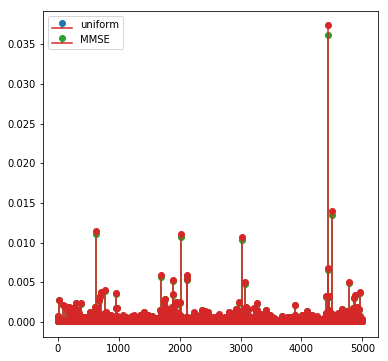

Most occuring words in class:  ['sci.crypt']
['agreement', 'incredibly', 'jr', 'offers', 'thinking', 'third', 'topics']


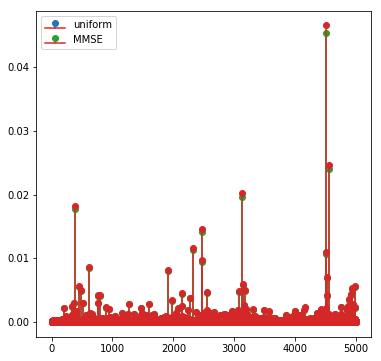

Most occuring words in class:  ['sci.electronics']
['ax', 'ken', 'online', 'title', 'trials']


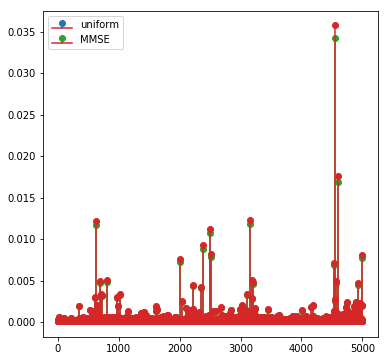

Most occuring words in class:  ['sci.med']
['affected', 'iii', 'isn', 'officials', 'theology', 'theoretical', 'tomorrow']


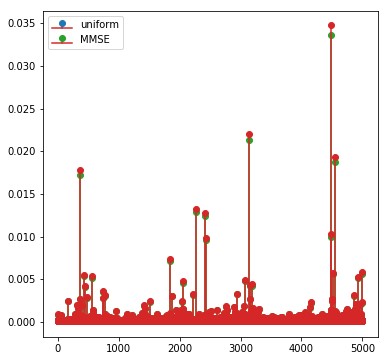

Most occuring words in class:  ['sci.space']
['apparent', 'improvement', 'item', 'oj', 'thinking', 'trade']


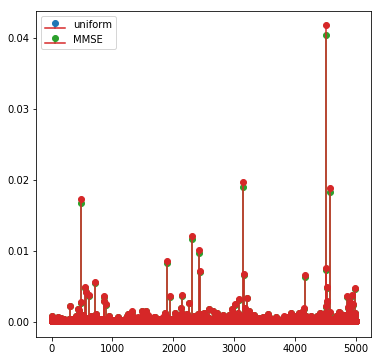

Most occuring words in class:  ['soc.religion.christian']
['67', 'geometry', 'his', 'hold', 'monitors', 'teams', 'tear', 'third']


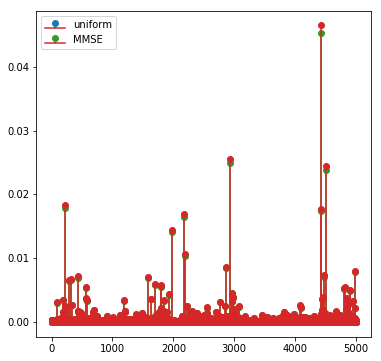

Most occuring words in class:  ['talk.politics.guns']
['ao', 'improvement', 'opposed', 'tends', 'tension', 'thursday']


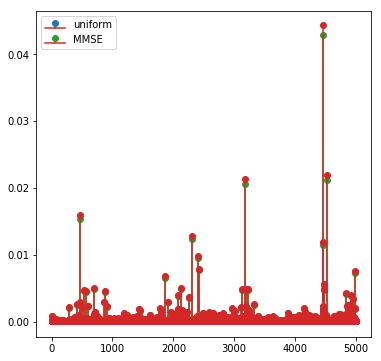

Most occuring words in class:  ['talk.politics.mideast']
['addition', 'insurance', 'org', 'tied', 'tiff', 'traffic']


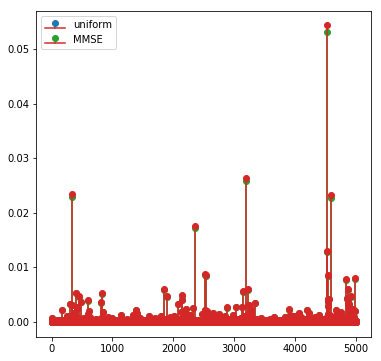

Most occuring words in class:  ['talk.politics.misc']
['absolute', 'hitler', 'injury', 'installed', 'northern', 'tobacco', 'told', 'trip']


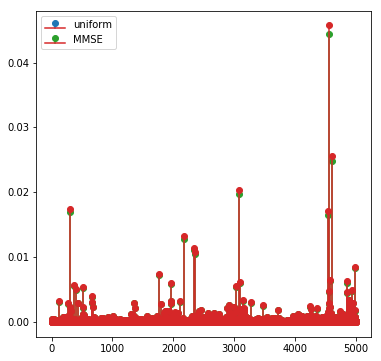

Most occuring words in class:  ['talk.religion.misc']
['82', 'identical', 'interview', 'nonsense', 'though', 'thought', 'tracking']


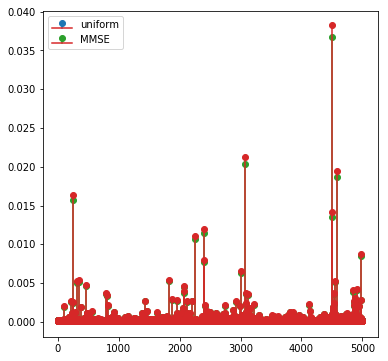

The probablity of error of the classifer is:  0.9620286776420606


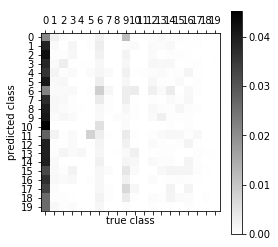

In [72]:
# (2) - (4)
newsgroups_train_all = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))

cv = CountVectorizer(max_features=MAX_WORDS) 
counts = cv.fit_transform(newsgroups_train_all.data) 

#Let's print out the words to see what they are
words = cv.get_feature_names()
#print(words)

categories = newsgroups_train_all.target_names
alpha = 10 #1 corresponds to a uniform distribution over the distributions; higher values concentrate the prior around the uniform distribution
theta_MMSE_store = np.zeros((20,MAX_WORDS))

for i, category in enumerate(categories):
    newsgroups_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'),categories=[category])
    counts = cv.fit_transform(newsgroups_train.data) #counts frequencies for each words, # gives tuples
    docs_tot = counts.shape[0] # total number of documents in a particular category
    y = np.array(np.sum(counts[0:docs_tot,:],0))
    y = np.reshape(y,(MAX_WORDS,))
    alpha_new = alpha + y
    
    theta_MMSE = alpha_new/np.sum(alpha_new)
    theta_MAP = (alpha_new-1)/np.sum(alpha_new-1)
    theta_MMSE_store[i,:] = theta_MMSE
    
    indices = theta_MAP>0.01
    idx= np.asarray(np.where(indices))[0,:]
    print('Most occuring words in class: ', [category])
    print([words[i] for i in idx])

    plt.figure(figsize=(6,6))
    plt.stem(1/MAX_WORDS*np.ones(MAX_WORDS),linefmt='C0',markerfmt='C0o')
    plt.stem(theta_MMSE,linefmt='C2',markerfmt='C2o')
    plt.stem(theta_MAP,linefmt='C3',markerfmt='C3o')
    plt.legend(['uniform','MMSE','MAP'])
    plt.legend(['uniform','MMSE'])
    plt.show()
    

# ML Estimator
newsgroups_test_all = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'))

categories = newsgroups_test_all.target_names
conf_matrix = np.zeros((20,20))
P_err = 0
for i, category in enumerate(categories):
    newsgroups_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'),categories=[category])
    counts = cv.fit_transform(newsgroups_test.data) 
    counts_dense = counts.todense()
    true_target = i
    docs_tot = counts.shape[0] # total number of documents in a particular category
    
    for docs in range(0,docs_tot):
        doc = counts_dense[docs,:]
        total_words = np.sum(doc)
        likelihoods = np.zeros(20)
        for j in range(0,20):
            cls_prb_est = theta_MMSE_store[j,:]
            num = 0
            den = 1
            for k in range(0,100):
                #num = num*(cls_prb_est[k]**doc[0,k])
                num = num + doc[0,k]*np.log(cls_prb_est[k])
                den = den*math.factorial(doc[0,k])
            #likelihood_cls = (num/den)*total_words
            likelihoods_cls = num
            likelihoods[j] = likelihoods_cls
        ML_est = np.argmax(likelihoods)
        conf_matrix[true_target,ML_est] = conf_matrix[true_target,ML_est] +1
        if true_target != ML_est:
            P_err = P_err+1

normalized_confmtrx = conf_matrix/np.sum(conf_matrix)
plt.matshow(normalized_confmtrx, cmap=plt.cm.gray_r)
plt.colorbar()
tick_marks = np.arange(0,20)
plt.xticks(tick_marks)
plt.yticks(tick_marks)
plt.ylabel('predicted class')
plt.xlabel('true class')

print('The probablity of error of the classifer is: ', P_err/np.sum(conf_matrix))

The probability of error tends to increase as the maximum number of words increases. 